# ROC

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Iris datasets

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
import numpy
ypred = clf.predict(X_test)
yprob = clf.predict_proba(X_test)
score = numpy.array(list(yprob[i,ypred[i]] for i in range(len(ypred))))

In [ ]:
data = numpy.zeros((len(ypred), 2))
data[:,0] = score.ravel()
data[ypred==y_test,1] = 1
data[:5]

array([[ 0.57921203,  1.        ],
       [ 0.62673633,  1.        ],
       [ 0.53804633,  1.        ],
       [ 0.48118301,  0.        ],
       [ 0.48815072,  0.        ]])

## ROC

In [ ]:
from mlstatpy.ml.roc import ROC

In [ ]:
roc = ROC(data)

In [ ]:
roc

Overall precision: 0.60 - AUC=0.886667
--------------
      score  label  weight
0  0.369367    0.0     1.0
1  0.383883    0.0     1.0
2  0.392391    0.0     1.0
3  0.437795    1.0     1.0
4  0.442822    0.0     1.0
--------------
       score  label  weight
45  0.792612    1.0     1.0
46  0.816263    1.0     1.0
47  0.842954    1.0     1.0
48  0.853571    1.0     1.0
49  0.889151    1.0     1.0
--------------
    Error Rate  Recognition Rate
0     0.000000          0.028571
1     0.000000          0.171429
2     0.000000          0.314286
3     0.000000          0.457143
4     0.000000          0.600000
5     0.066667          0.714286
6     0.200000          0.800000
7     0.400000          0.857143
8     0.600000          0.914286
9     0.800000          0.971429
10    1.000000          1.000000
--------------
    recall  precision
0     0.02   1.000000
1     0.12   1.000000
2     0.22   1.000000
3     0.32   1.000000
4     0.42   1.000000
5     0.52   0.961538
6     0.62   0.903226

In [ ]:
roc.auc()

0.88666666666666671

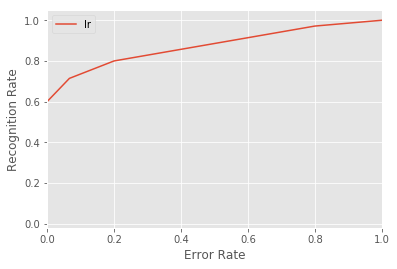

In [ ]:
roc.plot(nb=10,label="lr")

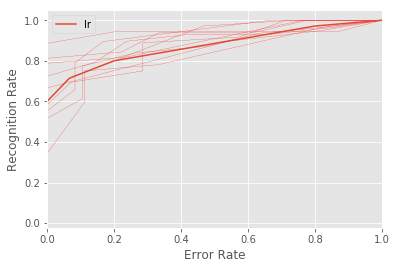

In [ ]:
roc.plot(nb=10, label="lr", bootstrap=10)

## ROC others views

In [ ]:
roc.plot_score()

AttributeError: 'ROC' object has no attribute 'plot_score'

In [ ]:
roc.plot_dist_score()

AttributeError: 'ROC' object has no attribute 'plot_dist_score'